# Seattle AirBNB Data Analysis

### Data Science NanoDegree - Project 1 

The project focuses on the analysis of Airbnb data for the city of Seattle, 2016. 

With this investigation I hope to draw some conclutions that might help the decision of invest or not invest in an Airbnb property in Seattle. To support this purpose and to guide the course of the analysis, the following questions were addressed:

**Q1.** What is the price and availability trend over time?

**Q2.** How can we characterize the type of properties that exist in seattle? 
   And how those features relate to the price?

**Q3.** Which are the most popular neighborhoods in Seattle?

**Q4.** Is a strict cancellation policy bad for the business?

**Q5.** Predicting Pricing - in which features should bet to make the most out of my airbnb?  



In [1]:
# Importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from IPython import display
from datetime import datetime as dt
import re

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline


# Loading Data

#Load Listings, including full descriptions and average review score
listings = pd.read_csv("C:/Users/FernandesM7/Desktop/#LoveData/Udacity ND - Data Science/Project1/listings.csv",low_memory=False)

# Load Reviews, including unique id for each reviewer and detailed comments
calendar = pd.read_csv("C:/Users/FernandesM7/Desktop/#LoveData/Udacity ND - Data Science/Project1/calendar.csv",low_memory=False)

# Load Calendar, including listing id and the price and availability for that day
reviews = pd.read_csv("C:/Users/FernandesM7/Desktop/#LoveData/Udacity ND - Data Science/Project1/reviews.csv",low_memory=False)


## 1.Data Understanding

In the **Data Understanding** phase, we will start by looking into the data and make small changes to data types:

    1.1 Calendar Understanding
    1.2 Reviews Understanding
    1.3 Listings Understandig

In [2]:
lis_rows = listings.shape[0]
lis_columns = listings.shape[1]

rev_rows = reviews.shape[0]
rev_columns = reviews.shape[1]

cal_rows = calendar.shape[0]
cal_columns = calendar.shape[1]

print("Listings dataframe has " + str(lis_rows) + " rows and "+ str(lis_columns)+ " columns")

print("Reviews dataframe has " + str(rev_rows) + " rows and "+ str(rev_columns)+ " columns")

print("Calendar dataframe has " + str(cal_rows) + " rows and "+ str(cal_columns)+ " columns")

Listings dataframe has 3818 rows and 92 columns
Reviews dataframe has 84849 rows and 6 columns
Calendar dataframe has 1048575 rows and 4 columns


### 1.1 Calendar Understanding

In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
listing_id    1048575 non-null object
date          1048236 non-null object
available     1048236 non-null object
price         699523 non-null object
dtypes: object(4)
memory usage: 32.0+ MB


In [4]:
#Calendar data type transformation

calendar["date"] = calendar["date"].astype('datetime64')
calendar["price"] = calendar["price"].replace('[\$,]', '', regex=True).astype('float')
calendar["available"] = calendar["available"].astype('category')

calendar.describe(include='all')

,listing_id,date,available,price
count,1048575,1048236,1048236,699523.000000
unique,3212,365,2,NaN
top,9696532,2016-01-19 00:00:00,t,NaN
freq,365,2873,699523,NaN
first,NaN,2016-01-04 00:00:00,NaN,NaN
last,NaN,2017-01-02 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,139.893136
std,NaN,NaN,NaN,103.280360
min,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,75.000000


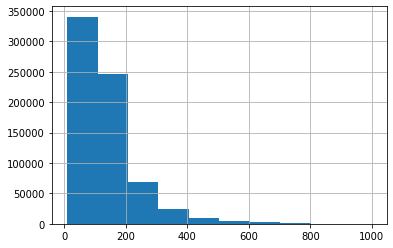

In [5]:
#Plot an histogram
calendar["price"].hist();

**Calendar Resume** 

For the _Calendar_ dataset we have historical data **since 04/Jan/2016 until 02/Jan/2017**, for **3214** unique listing ids. 

_Missing Values_

        -Date and Available : 339  -- probably to be removed
        -Price: 349 052            -- correspond to the dates which the listing_id was not available

_Price Variable_

       - Range between [10;999]
       - 50% cost less than $110
       - More than 75% cost less than $167
       - The average price is about $140


### 1.2 Reviews Understanding

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [8]:
#Reviews data type transformation

reviews["date"] = reviews["date"].astype('datetime64')
reviews["listing_id"] = reviews["listing_id"].astype('object')
reviews["review_id"] = reviews["id"].astype('object')
reviews["reviewer_id"] = reviews["reviewer_id"].astype('object')

reviews.describe(include='all')

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_id
count,84849.0,8.484900e+04,84849,84849.0,84849,84831,84849.0
unique,3191.0,NaN,1930,75730.0,14380,84136,84849.0
top,208356.0,NaN,2015-09-21 00:00:00,206203.0,David,The host canceled this reservation the day bef...,40894463.0
freq,474.0,NaN,580,67.0,870,57,1.0
first,NaN,NaN,2009-06-07 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-01-03 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,3.058765e+07,NaN,NaN,NaN,NaN,NaN
std,NaN,1.636613e+07,NaN,NaN,NaN,NaN,NaN
min,NaN,3.721000e+03,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.725127e+07,NaN,NaN,NaN,NaN,NaN


C:\Users\FernandesM7\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


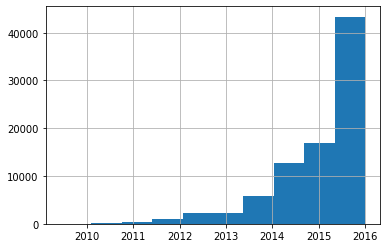

In [9]:
reviews["date"].hist();

**Reviews Resume** 

For the _Reviews_ dataset we have historical data **since 07/Jun/2009 until 03/Jan/2016**, for **3191** unique listing ids. 

_Missing Values_

        -There are 18 comments missing  -- proably to be removed
        
The number of reviews has been increasing over time !!

### 1.3 Listings Understanding

In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [11]:
#Check values of each variable and verify if the data type is well defined
listings["review_scores_rating"].head(10)

0    95.0
1    96.0
2    97.0
3     NaN
4    92.0
5    95.0
6    99.0
7    97.0
8    97.0
9    97.0
Name: review_scores_rating, dtype: float64

In [12]:
#Listings data type transformation

listings["id"] = listings["id"].astype('object')
listings["scrape_id"] = listings["scrape_id"].astype('object')
listings["host_id"] = listings["host_id"].astype('object')
listings["host_since"] = listings["host_since"].astype('datetime64')
listings["host_response_rate"] = listings["host_response_rate"].replace('[\%,]', '', regex=True).astype('float')
listings["price"] = listings["price"].replace('[\$,]', '', regex=True).astype('float')
listings["weekly_price"] = listings["weekly_price"].replace('[\$,]', '', regex=True).astype('float')
listings["monthly_price"] = listings["monthly_price"].replace('[\$,]', '', regex=True).astype('float')
listings["security_deposit"] = listings["monthly_price"].replace('[\$,]', '', regex=True).astype('float')
listings["cleaning_fee"] = listings["cleaning_fee"].replace('[\$,]', '', regex=True).astype('float')
listings["extra_people"] = listings["extra_people"].replace('[\$,]', '', regex=True).astype('float')
listings["calendar_last_scraped"] = listings["calendar_last_scraped"].astype('datetime64')
listings["first_review"] = listings["first_review"].astype('datetime64')
listings["last_review"] = listings["last_review"].astype('datetime64')

listings.describe(include='all')



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3818.0,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,2212,2884,3498,3498,3818,3498,3818.0,3818,3816,3816,3810,2959,3295,3295.000000,3045,3816,3816,3816,3518,3816.000000,3816.000000,3818,3816,3816,3818,3402,3818,3818,3818,3818,3811,3818,3818,3818,3818,3818.000000,3818.000000,3818,3817,3818,3818.000000,3802.000000,3812.000000,3817.000000,3818,3818,97.000000,3818.000000,2009.000000,1517.000000,1517.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818,3818,3818.000000,3818.000000,3818.000000,3818.000000,3818,3818.000000,3191,3191,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,3818.0,3818,1.000000e+00,1,3792,3478,3119,3742,1,2506,1999,2574,3498,3498,3818,3498,2751.0,2751,1466,1380,120,2011,4,NaN,2,2,2743,2743,102,NaN,NaN,116,2,2,1442,81,87,17,7,2,28,1,7,1,1,NaN,NaN,2,16,3,NaN,NaN,NaN,NaN,5,3284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,1,NaN,NaN,NaN,NaN,1,NaN,984,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,2970666.0,https://www.airbnb.com/rooms/7527242,2.016010e+13,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,https://a0.muscache.com/ac/pictures/104263096/...,https://a0.muscache.com/im/pictures/8846311/c2...,https://a2.muscache.com/ac/pictures/100783955/...,https://a2.muscache.com/ac/pictures/ae8dc528-5...,8534462.0,https://www.airbnb.com/users/show/8534462,Andrew,2013-08-30 00:00:00,"Seattle, Washington, United States",It would be my pleasure to share and explore t...,within an hour,NaN,100%,f,https://a2.muscache.com/ac/pictures/a4d7d053-c...,https://a2.muscache.com/ac/pictures/a4d7d053-c...,Capitol Hill,NaN,NaN,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"1st Avenue, Seattle, WA 98101, United States",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,NaN,NaN,t,House,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,today,t,NaN,NaN,NaN,NaN,2016-01-04 00:00:00,NaN,2015-09-21 00:00:00,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,1.0,1,3.818000e+03,3818,3,15,14,10,3818,17,39,32,1,1,1,1,46.0,46,56,51,3259,46,1692,NaN,3044,3038,46,46,405,NaN,NaN,595,3809,2997,30,351,397,794,3810,3817,420,3818,3810,3818

In [13]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96.0,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98.0,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,1000.0,3000.0,3000.0,40.0,1,0.0,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New m

**Listings Understanding** 

For the _Listings_ dataset each row represent a house available on Seattle AirBNB and its features. After exploring the basic statististics and some plotting, here are the main findings:

- A total of **3818** unique listings
- Each listing has a unique URL, which contains the listing_id
- The following variables have only constant values : TO BE REMOVED
    - **scrape_id**
    - **last_scraped**
    - **experiences_offered**
    - **market**
    - **country_code**
    - **country**
    - **city**
    - **smart_location**
    - **state**
    - **has_availability**
    - **calendar_last_scraped**
    - **license**
    - **requires_license**
    - **jurisdiction_names**
    
    
- All listings have description, picture_url,street,city,state, smart_location, latitude, longitude, is_location_exact, room_type, number_of_reviews, and host id (no missing values)

- Some of the hosts features have a few missing values: name, since, location, is superhost, thumbnail url, picture url,listings count, identity verifies; other have a significan amount: about, response time, response rate, neighbourhood. 

- **host_response_time** admit 4 unique values; **51%** of the hosts answer within 1 hour
- **host_response_rate** minimum is 17%, but 75% of the hosts have rate greater than 98%
- **host_acceptance_rate** is either 100% or 0%, but there is only one value equals 0% : TO BE REMOVED
- **57%** of the hosts only have 1 listing
- **host_total_listings_count** is equal to host_listing_count : TO BE REMOVED
- **neighbourhood** : TO BE REMOVED
- **zipcode** missing 7 and some strange values that must be corrected
- **square_feet** only has 97 not null : TO BE REMOVED
- **amenities** is a list of all the included amenities
- **weekly_price**,**monthly_price**,**security_deposit**,**cleaning_fee** have some representative missing values
- **review_scores_rating**, **review_scores_accuracy**, **review_scores_cleanliness**, **review_scores_checkin**, **review_scores_communication**, **review_scores_location**,**review_scores_value**, **reviews_per_month** have some representative missing values:DEFINE IMPUTATION METHOD

Not so important Missing values (text variables)
- **Space** has 569 missing values
- **neighborhood_overview** has 1032 missing values
- **notes** has 1606 missing values
- **transit** has 934 missing values
- **thumbnail_url**, **medium_url**, **xl_picture_url** have 320 missing values

In [14]:
# Check Number of missing values

listings.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

                         Response_Time  Count_hosts
host_response_time                                 
a few days or more  a few days or more           38
within a day              within a day          597
within a few hours  within a few hours          968
within an hour          within an hour         1692


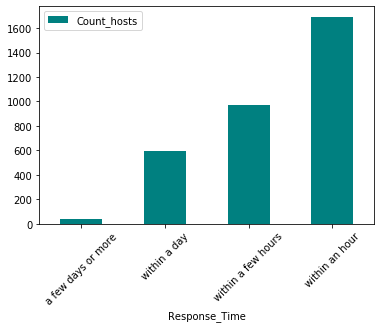

In [15]:
#Plot the Response Time by number of hosts

response_time = {'Response_Time':['a few days or more','within a day','within a few hours','within an hour'],
                    'Count_hosts': listings.groupby(["host_response_time"]).count()["id"]
                    }

response_time_df =pd.DataFrame(response_time,columns=['Response_Time','Count_hosts'])

response_time_df.plot.bar(x='Response_Time',y='Count_hosts', color='teal',rot=45);

print(response_time_df)

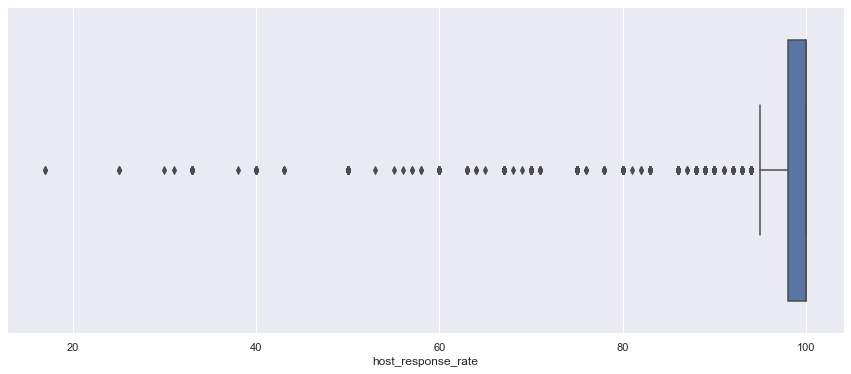

In [16]:
# Host Response Rate Boxplot
sns.set(rc={'figure.figsize':(15, 6)})
plt.subplots(1,1)
ax = sns.boxplot(x=listings["host_response_rate"])

    # A few outliers, but 75% of the the hosts have a rate greater than 97%

In [17]:
# Check City and smart location values -- despite written in different ways, all values correspont to Seattle city 
    ##Therefore in this sample the column City and smart_location can be removed
    
listings.groupby(["city","smart_location"]).count()["id"]

city                   smart_location           
Ballard, Seattle       Ballard, Seattle, WA            1
Phinney Ridge Seattle  Phinney Ridge Seattle, WA       1
Seattle                Seattle, WA                  3810
Seattle                Seattle , WA                    2
West Seattle           West Seattle, WA                2
seattle                seattle, wa                     1
西雅图                    西雅图, WA                         1
Name: id, dtype: int64

In [18]:
# The same for state column -- all values correspond to Seattle

listings.groupby(["state"]).count()["id"]

state
WA    3817
wa       1
Name: id, dtype: int64

In [19]:
# Zipcode have some strange values ('0    98122\ndtype: object','99\n98122' ) that must be corrected

listings.groupby(["zipcode"]).count()["id"]

#Check rows with zipcode strange values
    #listings[listings["zipcode"]=='0    98122\ndtype: object']

zipcode
98101        201
98102        339
98103        394
98104         95
98105        225
98106         58
98107        180
98108         56
98109        202
98112        167
98115        178
98116        112
98117        164
98118        154
98119        143
98121        196
98122        420
98125         71
98126         63
98133         46
98134          5
98136         44
98144        200
98146          5
98177         19
98178          7
98199         66
99\n98122      1
Name: id, dtype: int64

In [20]:
#How many listings have a host response rate under 60%

listings[listings["host_response_rate"] < 60].shape[0]

97

In [21]:
#The host_total_listings_count and host_listings_count are equal
## Therefore we can drop one of the columns

(listings['host_total_listings_count']-listings['host_listings_count']).sum()


0.0

In [22]:
#Facilities Features basic statistics

listings[['accommodates','bathrooms','bedrooms','beds']].describe()
                                

,accommodates,bathrooms,bedrooms,beds
count,3818.000000,3802.000000,3812.000000,3817.000000
mean,3.349398,1.259469,1.307712,1.735394
std,1.977599,0.590369,0.883395,1.139480
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,2.000000,2.000000
max,16.000000,8.000000,7.000000,15.000000


In [23]:
#Number of missing values for price variables
a = listings[["weekly_price","monthly_price","security_deposit","cleaning_fee"]].isnull().sum()
b = listings.shape[0]

print(a)
print(b)

#Percentage of missing values
print(a/b)

listings[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights']].describe()

weekly_price        1809
monthly_price       2301
security_deposit    2301
cleaning_fee        1030
dtype: int64
3818
weekly_price        0.473808
monthly_price       0.602672
security_deposit    0.602672
cleaning_fee        0.269775
dtype: float64


,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
count,3818.000000,2009.000000,1517.000000,1517.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,127.976166,788.481832,2613.336190,2613.336190,61.710904,1.672603,10.667627,2.369303,780.447617
std,90.250022,532.352269,1722.267981,1722.267981,48.830341,1.311040,17.585922,16.305902,1683.589007
min,20.000000,100.000000,500.000000,500.000000,5.000000,0.000000,0.000000,1.000000,1.000000
25%,75.000000,455.000000,1512.000000,1512.000000,25.000000,1.000000,0.000000,1.000000,60.000000
50%,100.000000,650.000000,2200.000000,2200.000000,50.000000,1.000000,0.000000,2.000000,1125.000000
75%,150.000000,950.000000,3150.000000,3150.000000,83.000000,2.000000,20.000000,2.000000,1125.000000
max,1000.000000,6300.000000,19500.000000,19500.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000


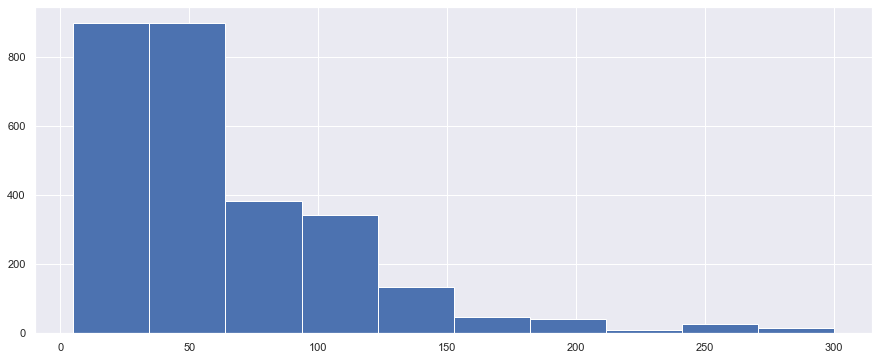

In [24]:
#Plot histogram for cleaning_fee
listings["cleaning_fee"].hist();

#50% of the listings have a cleaning fee under $50, but there are some extreme values up to $300

As weekly_price, monthly_price and security_deposit have a significant amount of missing values we will remove these columns

Regarding cleaning_fee, as its values are widely distributed, we will impute with the median value

review_scores_rating           0.169460
review_scores_accuracy         0.172342
review_scores_cleanliness      0.171032
review_scores_checkin          0.172342
review_scores_communication    0.170508
review_scores_location         0.171556
review_scores_value            0.171818
reviews_per_month              0.164222
dtype: float64


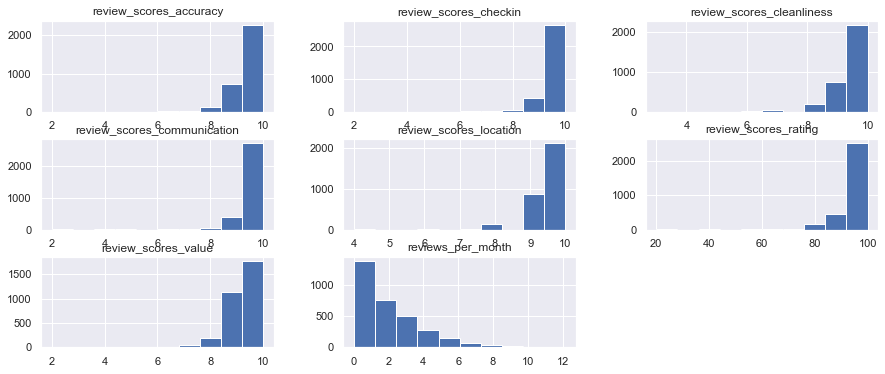

In [25]:
#Number of missing values for review variables
a = listings[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location","review_scores_value", "reviews_per_month"]].isnull().sum()
b = listings.shape[0]

#Percentage of missing values 
print(a/b)

#Plot histogram to all review variables
listings[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location","review_scores_value", "reviews_per_month"]].hist();

Although the review variables have about 17% of missing values, it was found that they occur in almost the same sample.As this is relevant information, which can have a direct impact on the customer's decision (whether it exists or not), we decided to keep the null values, but replacing them with -1.

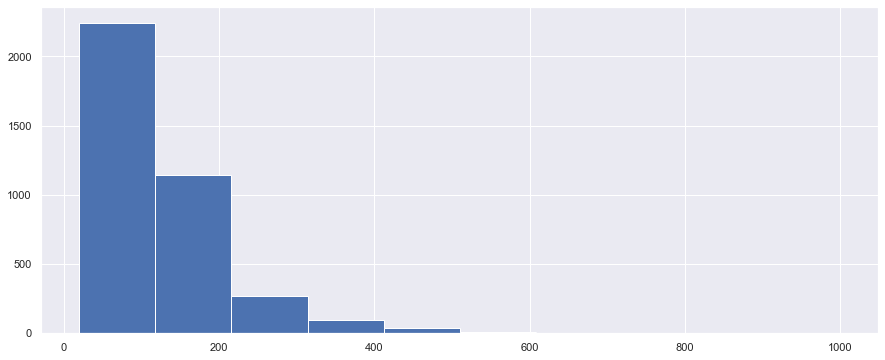

In [26]:
#Plot price histogram to check its distribution

listings["price"].hist();

## 2.Data Cleansing

In the **Data Cleansing** phase, we will apply the transformations thatresult ed from previous findings. This includes remove insignificant columns, remove/impute missing values,reduce complexity and dummy categorical variables

    2.1 Calendar Cleansing
    2.2 Reviews Cleansing
    2.3 Listings Cleansing


### 2.1 Calendar Cleansing

In [27]:
print(calendar.shape) # Initial shape of calendar dataframe

# Drop rows where Date and Available are missing
calendar = calendar.dropna(subset=['date', 'available'],axis = 0)
print(calendar.shape)

print(calendar['price'].isnull().sum())
#These missing values correspond to dates where the listing was not available. 
#We will keep the null values so we don't bias further calculations.


(1048575, 4)
(1048236, 4)
348713


In [28]:
#Transform True or False values into binary (1 or 0 , respectively)

def conv_truefalse(x):
    """
    This function will  convert true or false into binary ('1' or '0', respectively)
    - 0: false
    - 1: true
    
    Parameter:
    x: str with 't' or 'f'
    
    Returns:
    binary: 1 if true ; 0 if false
    """
    if pd.isnull(x):
        return 0
    else:
        if x=='f':
            return 0
        else:
            return 1

In [29]:
#Apply TrueFalse transformation to available variable

calendar["available"] = calendar["available"].apply(conv_truefalse).astype('int')
    
calendar.groupby(["available"]).count()["listing_id"]


available
0    348713
1    699523
Name: listing_id, dtype: int64

In [30]:
#There are no duplicated rows
calendar.duplicated().sum()

0

In [31]:
# Add new date features to calendar dataframe

#Create Week indicator 
calendar["date_week"] = calendar['date'].dt.strftime('%U')

#Create Weekday indicator
calendar['date_weekday']=calendar['date'].dt.strftime('%A')

#Create Month indicator
calendar['date_month']=calendar['date'].dt.month.astype('int')

calendar.head()

,listing_id,date,available,price,date_week,date_weekday,date_month
0,241032,2016-01-04,1,85.0,01,Monday,1
1,241032,2016-01-05,1,85.0,01,Tuesday,1
2,241032,2016-01-06,0,NaN,01,Wednesday,1
3,241032,2016-01-07,0,NaN,01,Thursday,1
4,241032,2016-01-08,0,NaN,01,Friday,1


### 2.2 Reviews Cleansing

In [32]:
print(reviews.head(5))

reviews["comments"].head(10)

  listing_id        id       date reviewer_id reviewer_name                                           comments review_id
0    7202016  38917982 2015-07-19    28943674        Bianca  Cute and cozy place. Perfect location to every...  38917982
1    7202016  39087409 2015-07-20    32440555         Frank  Kelly has a great room in a very central locat...  39087409
2    7202016  39820030 2015-07-26    37722850           Ian  Very spacious apartment, and in a great neighb...  39820030
3    7202016  40813543 2015-08-02    33671805        George  Close to Seattle Center and all it has to offe...  40813543
4    7202016  41986501 2015-08-10    34959538          Ming  Kelly was a great host and very accommodating ...  41986501


0    Cute and cozy place. Perfect location to every...
1    Kelly has a great room in a very central locat...
2    Very spacious apartment, and in a great neighb...
3    Close to Seattle Center and all it has to offe...
4    Kelly was a great host and very accommodating ...
5    Kelly was great, place was great, just what I ...
6    Kelly was great! Very nice and the neighborhoo...
7    hola all bnb erz - Just left Seattle where I h...
8    Kelly's place is conveniently located on a qui...
9    The place was really nice, clean, and the most...
Name: comments, dtype: object

For this project it was decided not to use the reviews dataset because the only insighful and valuable information was the written comments and we still don't have the necessary tools to process text.

But I would like to keep as a suggestion for future work, to process these data and analyze how the tone, the words and the positive or negative connotation impact availability and price over time.

### 2.3 Listings Cleansing

In [33]:
#Drop Columns with null or contant values
listings = listings.drop(['scrape_id','last_scraped','experiences_offered','market','country_code','country','city','smart_location','state','has_availability','calendar_last_scraped','license','requires_license','jurisdiction_names','host_total_listings_count','neighbourhood','square_feet'], axis=1)
print(listings.shape)


#Drop Columns with no data value 
listings = listings.drop(['listing_url',"thumbnail_url","medium_url","picture_url","xl_picture_url","host_thumbnail_url","host_picture_url","host_url","host_name","host_verifications","street"], axis=1)
print(listings.shape)


#Drop Response Rate Outliers
listings = listings[(listings.host_response_rate>=60.0) | (listings.host_response_rate.isnull())]
print(listings.shape)


#Drop Row where host_acceptance_rate is 0%
listings = listings[(listings.host_acceptance_rate == '100%') | (listings.host_acceptance_rate.isnull())]
print(listings.shape)


#Drop Column host_acceptance_rate
listings = listings.drop(['host_acceptance_rate'],axis=1)
print(listings.shape)


#Correction of zipcode values
listings["zipcode"].replace(to_replace='0    98122\ndtype: object', value='98122', inplace=True)
listings["zipcode"].replace(to_replace='99\n98122', value='98122', inplace=True)


#Fill zipcode missing values with the column most frequent value(mode)
zipcode_mode = str(listings["zipcode"].mode())
listings.zipcode.fillna(zipcode_mode, inplace=True)
print(listings["zipcode"].isnull().sum())


#Fill host_response_rate missing values with mean value
host_response_rate_mean = listings["host_response_rate"].mean()
listings.host_response_rate.fillna(host_response_rate_mean, inplace=True)
print(listings["host_response_rate"].isnull().sum())


#Fill host_since missing values with the most frequent value (mode)
host_since_mode = str(listings["host_since"].mode())
listings.host_since.fillna(host_since_mode,inplace=True)
print(listings["host_since"].isnull().sum())


#Fill host_listings_count missing values with the column median value
host_listings_count_median = listings["host_listings_count"].median()
listings.host_listings_count.fillna(host_listings_count_median, inplace=True)
print(listings["host_listings_count"].isnull().sum())


#Drop Colums with significant amount of missing values
listings = listings.drop(["weekly_price","monthly_price","security_deposit"], axis=1)
print(listings.shape)


#Fill cleaning_fee missing values with the column median value
cleaning_fee_median = listings["cleaning_fee"].median()
listings.cleaning_fee.fillna(cleaning_fee_median, inplace=True)
print(listings["cleaning_fee"].isnull().sum())


#Transform the first and last review date to the difference of these both dates, in months
listings['first_last_review_diff'] = listings['last_review'] - listings['first_review']
listings['first_last_review_diff_months'] = listings['first_last_review_diff']/np.timedelta64(1,'M')


#Drop Columns first_review and last_review
listings = listings.drop(['first_review','last_review','first_last_review_diff'],axis=1)
print(listings.shape)


#Drop rows where the number of bathrooms, bedrooms,beds or property type are not available
listings = listings.dropna(subset=['bathrooms', 'bedrooms','beds','property_type'])
print(listings.shape)

(3818, 75)
(3818, 64)
(3721, 64)
(3720, 64)
(3720, 63)
0
0
0
0
(3720, 60)
0
(3720, 59)
(3698, 59)


In [34]:
def impute_nan_review (x):
    """
    This function will impute missing values for review_scores_* columns and number of reviews per month
    - x: if x is not null
    - -1: if x is null
    
    Parameter:
    x: review_scores_* value
    
    Returns:
    float: -1 if x is null ; x if x is not null
    """
    if pd.isnull(x):
        return -1.0
    else:
        return x

In [35]:
# Apply function imputr_nan_review to review_scores columns
columns = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location","review_scores_value", "reviews_per_month","first_last_review_diff_months"]
for col in columns:
    listings[col] = listings[col].apply(impute_nan_review)

# Check number of missing values    
print(listings[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location","review_scores_value", "reviews_per_month",'first_last_review_diff_months']].isnull().sum().sum())


0


In [36]:
#Transform bed_type into is_real_bed

print(listings.groupby(['bed_type']).count()["id"])

def transf_real_bed (x):
    """
    This function will use the bed_type column to create a new one that defines if it is a real bed
    - 1: if x is 'Real Bed'
    - 0: if x is not 'Real Bed'
    
    Parameter:
    x: bed_type value
    
    Returns:
    int: 1 if x is equal to 'Real Bed' ; 0 if x is not equal to 'Real Bed'
    """
    if x == 'Real Bed':
        return 1
    else:
        return 0


bed_type
Airbed             24
Couch              12
Futon              71
Pull-out Sofa      45
Real Bed         3546
Name: id, dtype: int64


In [37]:
#Apply Real Bed function to Bed_Type columm
listings["is_real_bed"] = listings["bed_type"].apply(transf_real_bed)

#Drop bed_type column
listings = listings.drop(['bed_type'],axis=1)
print(listings.shape)


(3698, 59)


In [38]:
#Create a less complex calendar_updated variable, with less granularity

#Check values
print(listings.groupby(['calendar_updated']).count()["id"])

def transf_calendar_updated_time (x):
    """
    This function will use the calendar_updated column to create major ranges of time
    
    Parameter:
    x: calendar_updated values
    
    Returns:
    str: Days if x contains 'day' ; Weeks if x contains 'week'; Months if x contains 'month'; Years if x contains 'year; else 'Never'
    """
    if 'day' in x:
        return 'Days'
    else:
        if 'week' in x:
            return 'Weeks'
        else:
            if 'month' in x:
                return 'Months'
            else:
                if 'year' in x:
                    return 'Years'
                else:
                    return 'Never'


calendar_updated
1 week ago        26
10 months ago      7
11 months ago      5
12 months ago      5
13 months ago      2
14 months ago      1
15 months ago      1
16 months ago      1
17 months ago      1
2 days ago        96
2 months ago     261
2 weeks ago      332
22 months ago      2
3 days ago       161
3 months ago     209
3 weeks ago      295
30 months ago      1
4 days ago       141
4 months ago     125
4 weeks ago      204
5 days ago       130
5 months ago      84
5 weeks ago      150
6 days ago        27
6 months ago      27
6 weeks ago      111
7 months ago      23
7 weeks ago       59
8 months ago      14
9 months ago       7
a week ago       243
never             21
today            697
yesterday        229
Name: id, dtype: int64


In [39]:
#Apply transf_calendar_updated_time  function to calendar_updated columm
listings["calendar_updated_timerange"] = listings["calendar_updated"].apply(transf_calendar_updated_time)

#Drop calendar_updated column
listings = listings.drop(['calendar_updated'],axis=1)
print(listings.shape)


(3698, 59)


In [40]:
#For each text variable, create a new one with the lenght of the text

def word_count (x):
    """
    This function will be used to count the number of words in a sentence, excluding punctuation marks and special characters
    
    Parameter:
    x: text variable value
    
    Returns:
    int: number of words in a sentence
    """
    if pd.notnull(x):
        return len(re.findall(r'\w+', x))
    else:
        return 0

In [41]:
#Transform each text variable into a new numerical variable which is the total number of words in the sentence

text_var = ["name","summary","space","description","neighborhood_overview","notes","transit","host_location","host_about","host_neighbourhood"]

for col in text_var:
    listings[col+'_words_count'] = listings[col].apply(word_count)

#Print the initial number of colums
print(listings.shape[1])

for col in text_var:
    listings.drop(col, axis=1, inplace=True)

#Print the number of colums ater the transformation
print(listings.shape[1])

69
59


In [42]:
#Apply TrueFalse conversion function, defined previously, to transform the variables into binaries

truefalse_list = ["host_is_superhost","host_has_profile_pic","host_identity_verified","is_location_exact","instant_bookable","require_guest_profile_picture","require_guest_phone_verification"]

for col in truefalse_list:
    listings[col] = listings[col].apply(conv_truefalse)
    
listings.groupby([col]).count()["id"]


require_guest_phone_verification
0    3331
1     367
Name: id, dtype: int64

In [43]:
#Clean the amenities values of special characters 
clean_amenities = listings["amenities"].str.strip('{}').str.replace('"','').str.replace('(','').str.replace(')','').str.split(',')
clean_amenities


#Create a list of unique amenities values
amenities_list = []
for i in clean_amenities:
    for amenity in i:
        if amenity not in amenities_list and amenity!='':
            amenities_list.append(amenity)

In [44]:
amenities_list

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Free Parking on Premises',
 'Buzzer/Wireless Intercom',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'First Aid Kit',
 'Safety Card',
 'Fire Extinguisher',
 'Essentials',
 'Pets Allowed',
 'Pets live on this property',
 'Dogs',
 'Cats',
 'Hot Tub',
 'Indoor Fireplace',
 'Shampoo',
 'Breakfast',
 '24-Hour Check-in',
 'Hangers',
 'Hair Dryer',
 'Iron',
 'Laptop Friendly Workspace',
 'Suitable for Events',
 'Elevator in Building',
 'Lock on Bedroom Door',
 'Wheelchair Accessible',
 'Gym',
 'Pool',
 'Smoking Allowed',
 'Other pets',
 'Doorman',
 'Washer / Dryer']

In [45]:
#Create a new binary variable for each amenity
# 1 - the listing has the amenity available
# 0 - the listing doesn't have the amenity available

for amenity in amenities_list:
    listings['Amenity_'+amenity]=listings.amenities.str.contains(amenity)
    listings['Amenity_'+amenity]=(listings['Amenity_'+amenity]==True).astype(int)                                                               
      
#Check the shape of the df after transformation
listings.shape

(3698, 100)

In [46]:
listings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,first_last_review_diff_months,is_real_bed,calendar_updated_timerange,name_words_count,summary_words_count,space_words_count,description_words_count,neighborhood_overview_words_count,notes_words_count,transit_words_count,host_location_words_count,host_about_words_count,host_neighbourhood_words_count,Amenity_TV,Amenity_Cable TV,Amenity_Internet,Amenity_Wireless Internet,Amenity_Air Conditioning,Amenity_Kitchen,Amenity_Heating,Amenity_Family/Kid Friendly,Amenity_Washer,Amenity_Dryer,Amenity_Free Parking on Premises,Amenity_Buzzer/Wireless Intercom,Amenity_Smoke Detector,Amenity_Carbon Monoxide Detector,Amenity_First Aid Kit,Amenity_Safety Card,Amenity_Fire Extinguisher,Amenity_Essentials,Amenity_Pets Allowed,Amenity_Pets live on this property,Amenity_Dogs,Amenity_Cats,Amenity_Hot Tub,Amenity_Indoor Fireplace,Amenity_Shampoo,Amenity_Breakfast,Amenity_24-Hour Check-in,Amenity_Hangers,Amenity_Hair Dryer,Amenity_Iron,Amenity_Laptop Friendly Workspace,Amenity_Suitable for Events,Amenity_Elevator in Building,Amenity_Lock on Bedroom Door,Amenity_Wheelchair Accessible,Amenity_Gym,Amenity_Pool,Amenity_Smoking Allowed,Amenity_Other pets,Amenity_Doorman,Amenity_Washer / Dryer
0,241032,956883,2011-08-11 00:00:00,within a few hours,96.000000,0,3.0,1,1,West Queen Anne,Queen Anne,98119,47.636289,-122.371025,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,50.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,moderate,0,0,2,4.07,50.037988,1,Weeks,4,0,182,182,0,0,0,4,75,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,953595,5177328,2013-02-21 00:00:00,within an hour,98.000000,1,6.0,1,1,West Queen Anne,Queen Anne,98119,47.639123,-122.365666,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,1,1,6,1.48,28.320910,1,Days,5,36,150,153,27,169,28,4,14,2,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3308979,16708587,2014-06-12 00:00:00,within a few hours,67.000000,0,2.0,1,1,West Queen Anne,Queen Anne,98119,47.629724,-122.369483,1,House,Entire home/apt,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,0,0,2,1.15,13.141954,1,Weeks,6,38,181,172,117,28,34,4,64,2,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7421966,9851441,2013-11-06 00:00:00,NaN,96.414138,0,1.0,1,1,West Queen Anne,Queen Anne,98119,47.638473,-122.369279,1,Apartment,Entire home/apt,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,50.0,1,0.0,1,1125,0,0,0,143,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,flexible,0,0,1,-1.00,-1.000000,1,Months,3,43,0,43,0,0,0,4,0,2,0,0,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,278830,1452570,2011-11-29 00:00:00,within an hour,100.000000,0,2.0,1,1,West Queen Anne,Queen Anne,98119,47.632918,-122.372471,1,House,Entire home/apt,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,125.0,6,15.0,1,1125,30,60,90

In [47]:
#Create a temporary dataframe with the count and percentage of each amenity
temp_amenity_count = pd.DataFrame(columns = ['Amenity','Count','Percent'])

#Fill the temporary dataframe with values 
for amenity in amenities_list:
    column_sum = listings['Amenity_'+amenity].sum()
    temp_amenity_count = temp_amenity_count.append({'Amenity': amenity,'Count': column_sum, 'Percent': np.around(column_sum*100/(listings.shape[0]), decimals=2)}, ignore_index=True)
    temp_amenity_count = temp_amenity_count.sort_values(by=['Count'], ascending=False)
                                                   
        
temp_amenity_count                                                   
                                                   

,Amenity,Count,Percent
0,Internet,3585,96.94
1,Wireless Internet,3561,96.30
2,Heating,3524,95.29
3,Kitchen,3325,89.91
4,Smoke Detector,3198,86.48
5,Essentials,3150,85.18
6,Dryer,3027,81.86
7,Washer,2902,78.47
8,TV,2658,71.88
9,Shampoo,2611,70.61


Clearly the internet is considered an essential asset and for this reason it is the first of all the available amenities, present in 97% of the listings. Even appear first than Heating, Kitchen and Smoke Detector, that appear right after.

At the end of the list are amenities like smoking allowed, doorman, pool and suitable for events. This type of amenities can be important for a niche of customers, however it can be decisive in their decision.

In [48]:
#We will drop the Washer/Dryer amenity as it only appers once and all amenity with less then 1%
#We will aslo drop the original amenities coluns, as it is redundant to have it

amenities_to_drop = temp_amenity_count.Amenity[temp_amenity_count["Percent"]<1]
for amenity in amenities_to_drop:
    listings.drop(columns='Amenity_'+amenity,inplace=True)

listings.drop(columns='amenities',inplace=True)

In [49]:
#Check the current status of the listings df
print(listings.shape)
listings.info()

(3698, 95)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3698 entries, 0 to 3817
Data columns (total 95 columns):
id                                    3698 non-null object
host_id                               3698 non-null object
host_since                            3698 non-null object
host_response_time                    3177 non-null object
host_response_rate                    3698 non-null float64
host_is_superhost                     3698 non-null int64
host_listings_count                   3698 non-null float64
host_has_profile_pic                  3698 non-null int64
host_identity_verified                3698 non-null int64
neighbourhood_cleansed                3698 non-null object
neighbourhood_group_cleansed          3698 non-null object
zipcode                               3698 non-null object
latitude                              3698 non-null float64
longitude                             3698 non-null float64
is_location_exact                     3698 non-null int

,review_scores_rating,review_scores_accuracy,review_scores_value
0,95.0,10.0,10.0
1,96.0,10.0,10.0
2,97.0,10.0,10.0
3,-1.0,-1.0,-1.0
4,92.0,9.0,9.0
5,95.0,10.0,10.0
6,99.0,10.0,10.0
7,97.0,10.0,10.0
8,97.0,10.0,10.0
9,97.0,10.0,9.0


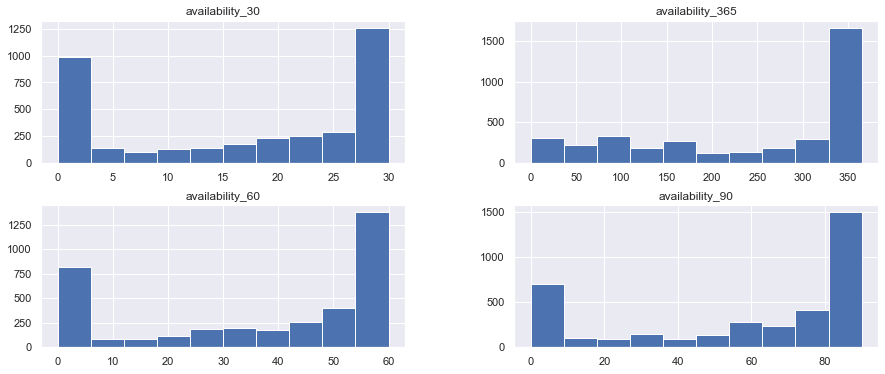

In [50]:
#Check distribution of availability variables
listings[["availability_30","availability_60","availability_90","availability_365"]].hist()

listings[["review_scores_rating","review_scores_accuracy","review_scores_value"]].head(10)

The number of available days varies considerably in intervals of 30, 60, 90 or 365. However, more than 500 listings are able to keep the property occupied almost all days of the year. 

However in all time interval the great expression occurs almost at the maximum availability.

# Q1. What is the price and availability trend over time?

First of all we are interested in understanding how the availability and prices of the airbnb market vary in seattle. 

Before making an investment in this sector it is important to have an idea of the demand, the existing offers and what is the average revenue generated, to assess whether it is profitable or not to invest.

In [51]:
#Overall the availability is very similar through all weekdays. 
#However Sunday and Monday are the days with greater availability.

calendar.groupby(["date_weekday"]).sum()["available"].sort_values()

date_weekday
Saturday      99193
Friday        99376
Thursday      99489
Wednesday     99821
Tuesday       99900
Sunday       100027
Monday       101717
Name: available, dtype: int32

In [52]:
#How does the occupation rate fluctuates over the year?

availablity_rate_30 = round(listings["availability_30"]*100/30)
availablity_rate_60 = round(listings["availability_60"]*100/60)
availablity_rate_90 = round(listings["availability_90"]*100/90)
availablity_rate_365 = round(listings["availability_365"]*100/365)

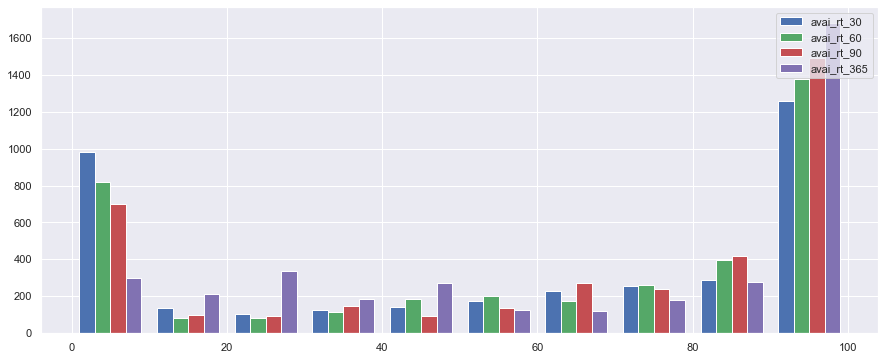

In [53]:
plt.style.use('seaborn-deep')

x = availablity_rate_30
y = availablity_rate_60
z = availablity_rate_90
w = availablity_rate_365
bins = np.linspace(0, 100, 11)

plt.hist([x, y, z, w], bins, label=['avai_rt_30','avai_rt_60','avai_rt_90','avai_rt_365'])
plt.legend(loc='upper right')
plt.show()

* The number of listings with availability rates under 10% it is clearly lower when the time range increses
* On the other hand, most of the listings have full availabily most of the year

In [54]:
#Check the mean availability over time
#Check the mean, minimum and maximum price over time

avail_price_year = calendar.groupby(['date']).agg({'available':['mean'], 'price':['mean','min','max']})
avail_price_year.columns=['Mean_Availability','Mean_Price','Min_Price','Max_Price']
avail_price_year.head()

,Mean_Availability,Mean_Price,Min_Price,Max_Price
date,,,,
2016-01-04,0.457362,123.423896,25.0,975.0
2016-01-05,0.484511,122.015805,25.0,899.0
2016-01-06,0.468500,123.109955,26.0,899.0
2016-01-07,0.453533,123.664620,26.0,899.0
2016-01-08,0.463279,130.246431,20.0,939.0


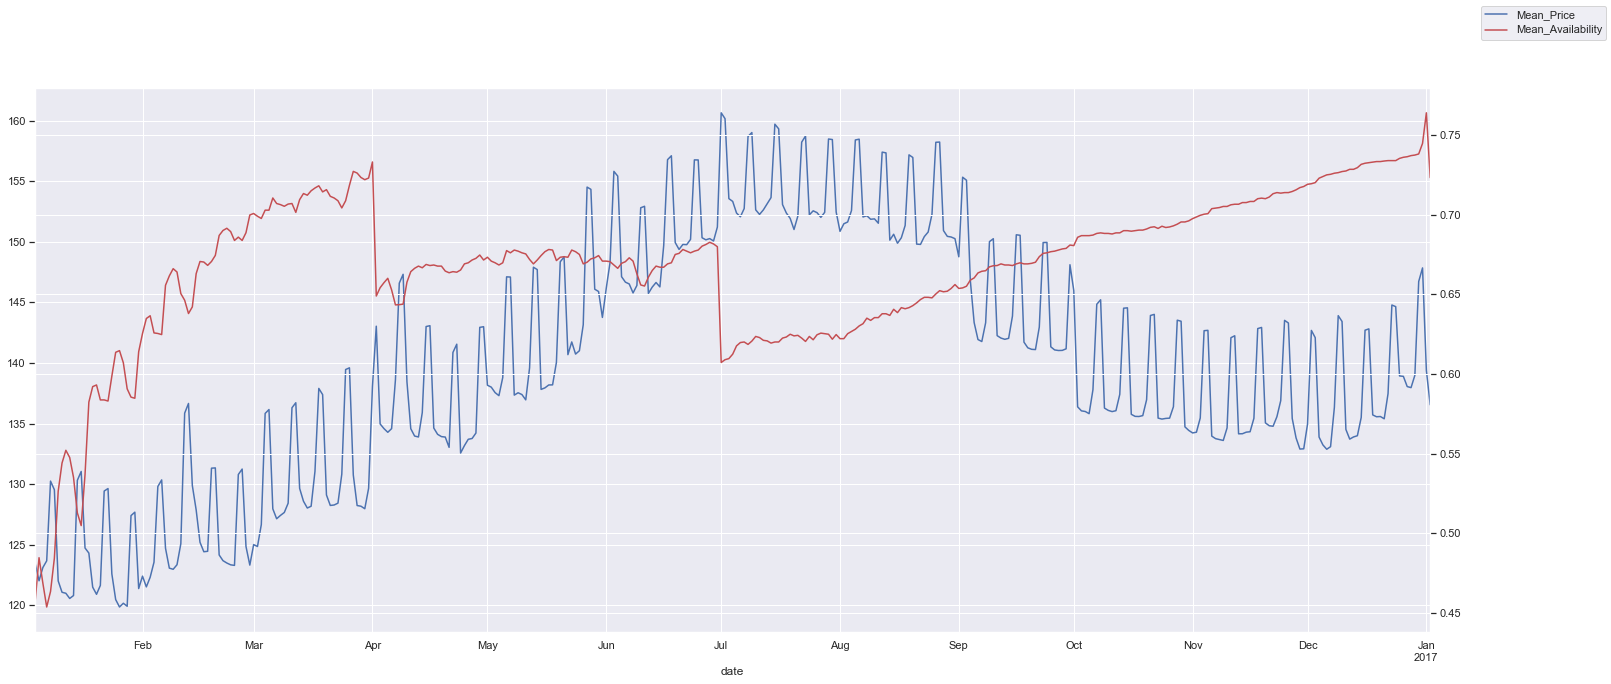

In [55]:
#Plot the mean availability and price of the listings over time
sns.set(rc={'figure.figsize':(25, 10)})

ax = avail_price_year.Mean_Price.plot(x = 'Date', y = 'Mean Price', legend = False, color = 'b' )
ax2 = ax.twinx()

avail_price_year.Mean_Availability.plot(x = 'Date', y = 'Mean Availability', ax = ax2, legend = False, color = 'r')
ax.figure.legend();

**Price Trend**

* The overall trend is for the average price to increase from January to the end of June. Then it suffers a small decrease the following two months, and begins to gradually decrease until the end of December.

* However, there is a big price fluctuation in each month, always with the same periodicity. This leads us to believe that there is clarly a price discrepancy between days of the week, within each month, which we will analyze. 

* The beginning of 2017 seems to have better prices than 2016.


**Availability Trend**

* There are two obvious points where the availability drops abruptly, which are the beginning of April and July.

* July is the high season, as the month has the lowest availability rate, therefore the greatest occupation rate (with higher prices). 

* In the beggining of 2016 the rate was also really low

* In terms of availability we can see four trends:
    - Increasing from January to April
    - Lower rate, but constant from April until July
    - The lowest rate between July and August
    - Slowly increases until the end of the year

* Doesn't seem to be any kind of periodicity within each month

**Relation between price and availability**

* The relationship between the two variables is not direct. Their behavior can be explained by seasonality and consequent demand fluctuation, and not by a direct correlation between them:
    - Between January and April, as low season, prices are lower and availability is higher;
    - Between April and July, as middle season, the availability decreases (higher demand) and remains constant. Prices continue to increase until the high season;
    - July to September,as high season, with less availability although prices are the highest of the year;
    - After September, their trend is reversed: availability increases and prices falls.
    

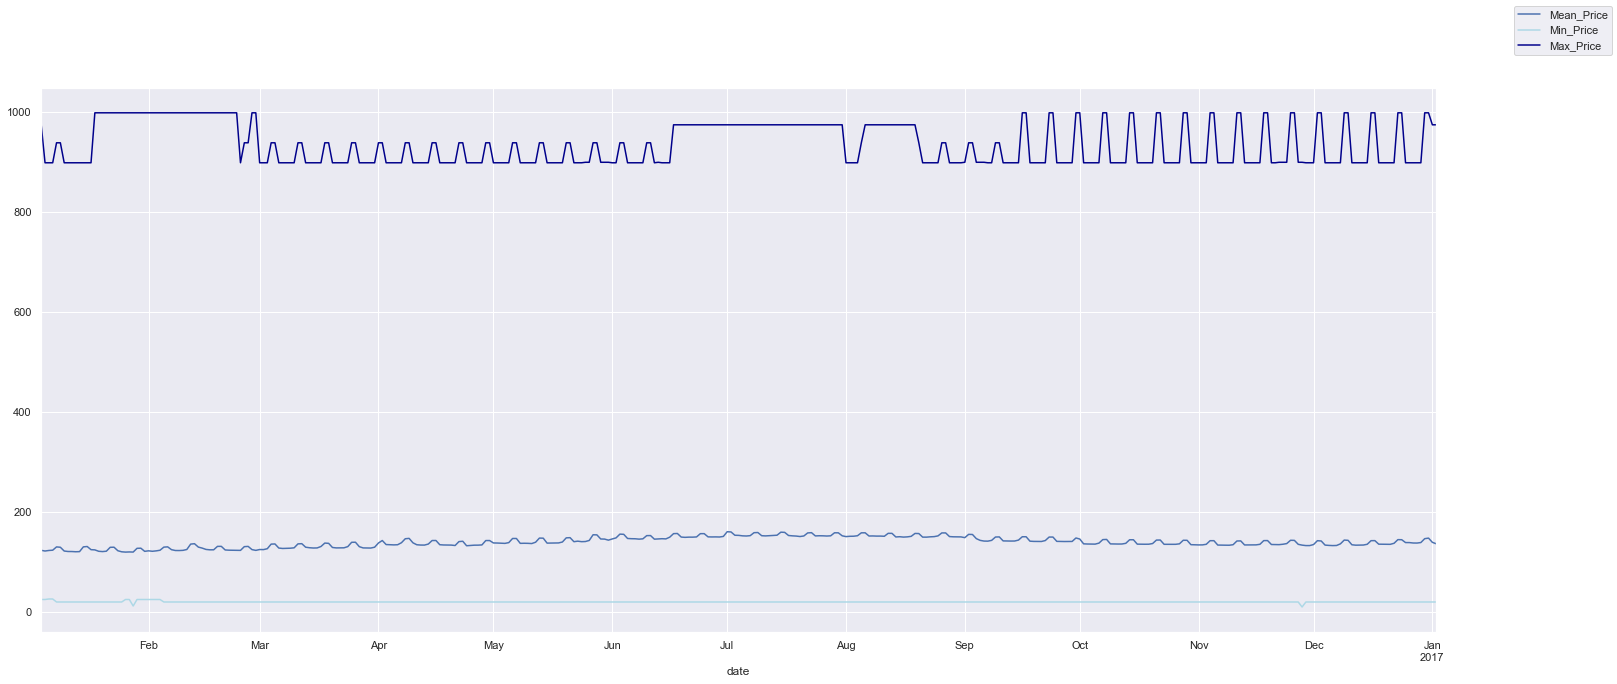

In [56]:
# Compare average price with its min and max for each month
sns.set(rc={'figure.figsize':(25, 10)})
sns.axes_style("darkgrid")

ax = avail_price_year.Mean_Price.plot(x = 'Date', y = 'Mean Price', legend = False, color = 'b' )

avail_price_year.Min_Price.plot(x = 'Date', y = 'Min Price', legend = False, color = 'lightblue')
avail_price_year.Max_Price.plot(x = 'Date', y = 'Max Price', legend = False, color = 'darkblue')

ax.figure.legend();


#The maximum of maximum price is reached in from January to March, and from middle June to middle August.

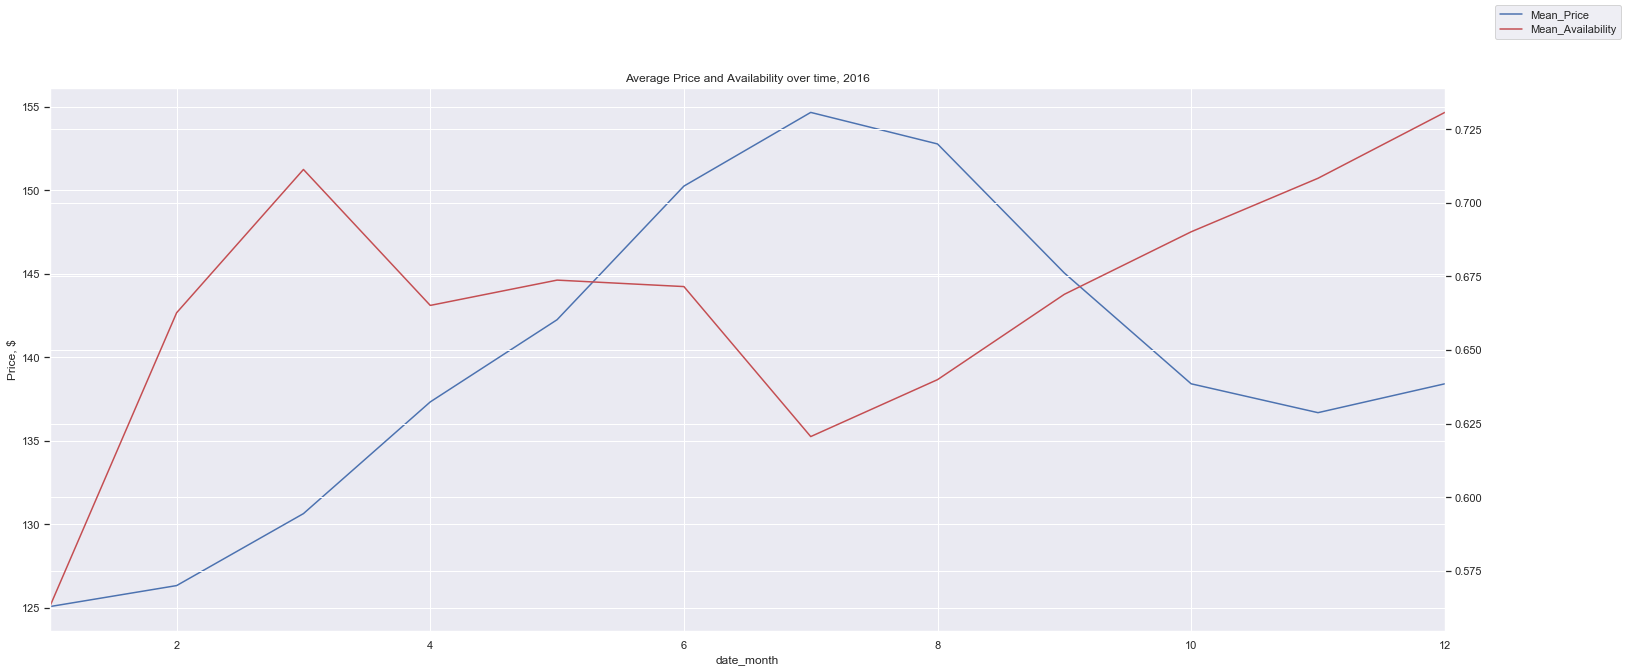

In [57]:
# Compare the mean availability and mean price over months

avail_price_month = calendar.groupby(['date_month']).agg({'available':['mean'], 'price':['mean','min','max']})
avail_price_month.columns=['Mean_Availability','Mean_Price','Min_Price','Max_Price']


# plot line
sns.set(rc={'figure.figsize':(25, 10)})

ax = avail_price_month.Mean_Price.plot(x = 'Month', y = 'Mean Price', legend = False, color = 'b' )
ax2 = ax.twinx()

avail_price_month.Mean_Availability.plot(x = 'Month', y = 'Mean Availability', ax = ax2, legend = False, color = 'r')

ax.figure.legend()
ax.set_title('Average Price and Availability over time, 2016')
ax.set_ylabel('Price, $');

With this plot we lose the noise of all variance with in the months and the trends become more clear. 

In this view the drop in availability is softer and happens gradually during the months of March and June.

In [58]:
# As we saw before, there is some periodicity in price according to the weekday

avail_price_weekday = calendar.groupby(['date_weekday']).agg({'available':['mean'], 'price':['mean','min','max']})
avail_price_weekday.columns=['Mean_Availability','Mean_Price','Min_Price','Max_Price']

Text(0.5, 1.0, 'Mean Price evolution over time, by weekday')

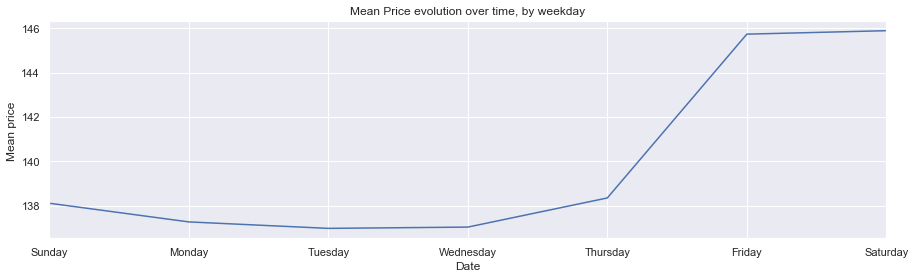

In [59]:
order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.set(rc={'figure.figsize':(15, 4)})

ax = avail_price_weekday.Mean_Price.loc[order].plot()
ax.set_ylabel('Mean price ')
ax.set_xlabel('Date')
ax.set_title('Mean Price evolution over time, by weekday')

As we can confirm with the graph above, there is a clear price distinction on Fridays and Saturdays.
From Sunday and for the rest of the week the average price it is much lower.

# Q2. How can we characterize the type of properties that exist in seattle? And how those features relate to the price?

In this second question the goal is to understand what kind of properties there are in Seattle and what kind of features they have to offer. In addition, will the type of features be reflected in the price?

We will evaluate the type of properties, the number of rooms in the houses, the available amenities and also some characteristics of the hosts.

In fact, if there is a real interest to enter the Airbnb market, it is important to identify which elements can be differentiating and how this can play with the price.

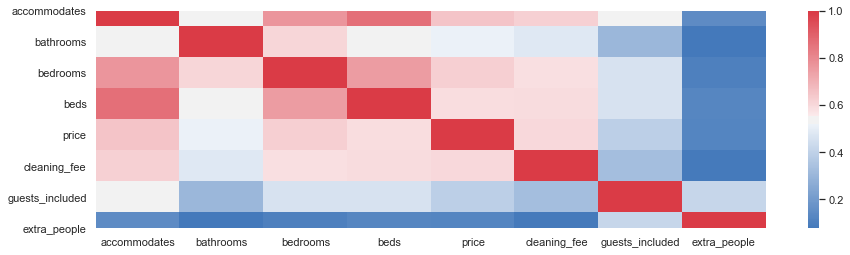

In [60]:
#Create a list of features
feats = listings[['accommodates','bathrooms','bedrooms','beds','price','cleaning_fee','guests_included','extra_people']]

#Plot a heatmap with the correlation between the features
sns.heatmap(feats.corr(),cmap=sns.diverging_palette(250, 10,as_cmap=True));

* There is a strong positive correlation between the number of accommodates and and the number of beds (as it is to be expected) and the number of bedrooms

* The feature with the strongest positve correlation to price is the accommodation: Greater the number of accommodates, greater the price. 

* The feature with the strongest negative correlation to price is the extra people price. It seems that greater the price, the lower the extra people fee. 

* Actually the extra people fee has a negative correlation with all other features. The bigger the house(more bedrooms, beds, bathrooms), the lower the extra people fee, what makes sense. 

In [61]:
# Reduce complexity in Property Type by grouping some types into major categories

listings["property_type"].replace(to_replace=['Treehouse','Chalet','Yurt','Bungalow','Camper/RV'], value='Cabin', inplace=True)
listings["property_type"].replace(to_replace=['Dorm'], value='Bed & Breakfast', inplace=True)
listings["property_type"].replace(to_replace=['Boat','Tent'], value='Other', inplace=True)

In [62]:
#Group property features by the type of property
property_features = listings.groupby('property_type').agg({'id':['count'],
                                       'accommodates': ['mean'],
                                       'bathrooms': ['mean'],
                                       'bedrooms': ['mean'],
                                       'beds': ['mean'],
                                       'price': ['mean'],
                                       'cleaning_fee': ['mean'],
                                       'guests_included': ['mean'],
                                       'extra_people': ['mean']})
property_features.columns=['Count',
                           'Mean_Accommodates',
                           'Mean_Bathrooms',
                           'Mean_Bedrooms',
                           'Mean_Beds',
                           'Mean_Price',
                           'Mean_CleaningFee',
                           'Mean_Guests',
                           'Mean_ExtraPeople']

property_features.sort_values(by = 'Count', ascending = False)


,Count,Mean_Accommodates,Mean_Bathrooms,Mean_Bedrooms,Mean_Beds,Mean_Price,Mean_CleaningFee,Mean_Guests,Mean_ExtraPeople
property_type,,,,,,,,,
House,1685,3.634421,1.399110,1.605935,1.946588,131.731157,61.839169,1.890801,11.715727
Apartment,1646,3.111786,1.094775,1.032807,1.538275,122.844471,56.013973,1.479344,9.749696
Townhouse,114,3.473684,1.548246,1.508772,1.824561,129.596491,57.885965,1.973684,12.561404
Condominium,90,3.411111,1.227778,1.244444,1.700000,150.844444,61.055556,1.622222,10.833333
Cabin,52,2.673077,1.009615,0.730769,1.557692,111.634615,41.576923,1.288462,5.673077
Loft,40,3.000000,1.125000,0.750000,1.650000,135.700000,52.825000,1.450000,9.925000
Bed & Breakfast,38,2.500000,1.763158,1.000000,1.684211,107.894737,40.684211,1.315789,13.710526
Other,33,2.515152,1.393939,1.060606,1.545455,133.484848,51.393939,1.545455,10.454545


* In Seattle there are mostly Houses, Apartments and Townhouses available, which are also those that on average have more bedrooms, beds and bathrooms.

* However Condominiums and Lofts have the highest average prices.

* Confirming the previous assumption regarding the cleaning fee, it is also visible that Bed & Breakfast properties have a higher fee, followed by ground houses (houses and townhouses).

* Cabins and Bed & Breakfast properties have a slightly lower cleaning fees.

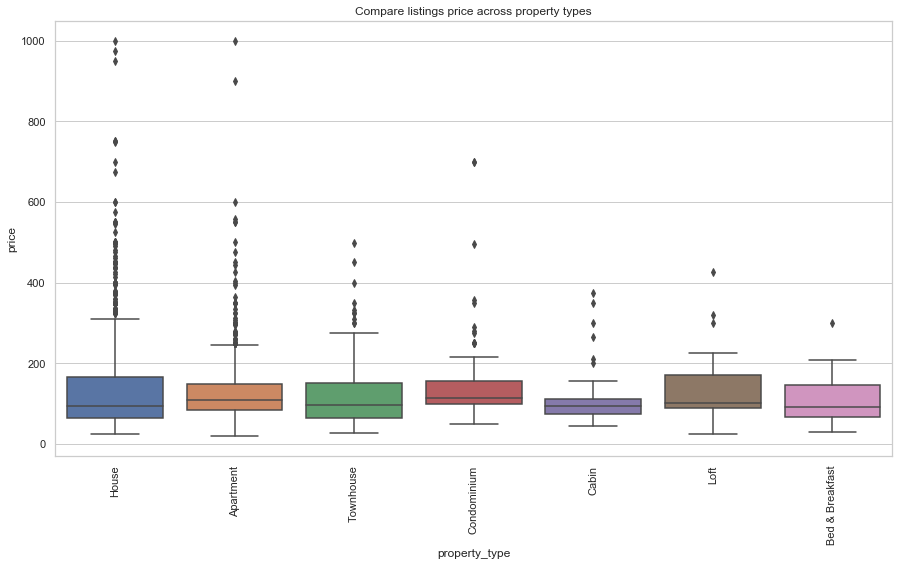

In [63]:
#Plot the distribution of price by type of property

sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")

ax = sns.boxplot(x='property_type', y='price', data=listings ,order = listings.property_type.value_counts().iloc[:7].index)
plt.xticks(rotation=90)
plt.title ("Compare listings price across property types");


* Although Condominiums have the highest average price, Houses have the highest absolute prices, with a few extreme values. 

* Cabins, Condominiums and Bed & Breakfast properties have the lower variability of price.


* And for each type of property, are there substantial differences for those belonging to superhosts?

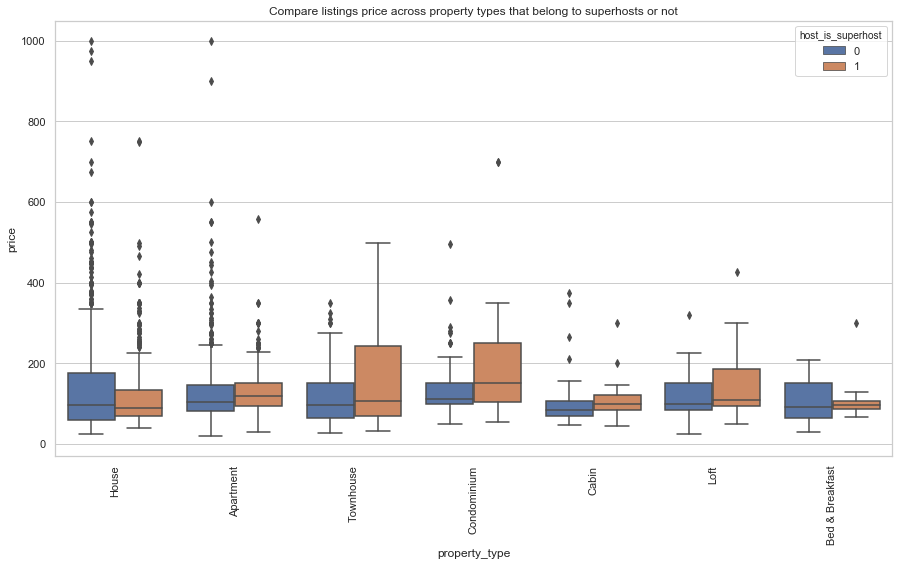

In [64]:
#Compare the distribution of price by type of property, for superhosts and non superhosts

sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")

ax = sns.boxplot(x='property_type', y='price', hue = 'host_is_superhost' ,data=listings ,order = listings.property_type.value_counts().iloc[:7].index)
plt.xticks(rotation=90)
plt.title ("Compare listings price across property types that belong to superhosts or not");


These results are very interesting. There are 3 groups of properties: 
   * Those which have the expected behaviour, i.e, properties with superhosts usually have higher prices,in average and absolute values: **Townhouses, Condominiums and Lofts**
    
   * Those for which the behavior is practically the same, in terms of variability and average, minimum and maximum values: **Apartments and Cabins** 
    
   * Those for which the superhosts properties have lower prices and lower variance : **Houses and Bed & Breakfast**
    
* Still, higher prices continue to be found in Houses and Apartments owned by hosts that are not superhosts. 

* Being a superhost can actually compensate for Townhouses and Condominium owners, where the price is reasonably higher

In [65]:
#Check how many super hosts exist per property 
print(listings.groupby('host_is_superhost').count()['id']) 

listings.groupby(['property_type','host_is_superhost']).count()['id'].sort_values(ascending = False)

host_is_superhost
0    2924
1     774
Name: id, dtype: int64


property_type    host_is_superhost
Apartment        0                    1328
House            0                    1307
                 1                     378
Apartment        1                     318
Townhouse        0                      92
Condominium      0                      76
Other            0                      31
Cabin            0                      31
Bed & Breakfast  0                      30
Loft             0                      29
Townhouse        1                      22
Cabin            1                      21
Condominium      1                      14
Loft             1                      11
Bed & Breakfast  1                       8
Other            1                       2
Name: id, dtype: int64

The conclusion is that only 26% of the host of Seattle are considered superhosts. 

* But for most of the cases all superhosts have greater average prices; 
* Most of the superhosts of the city are owners of Houses or apartments, around 90%

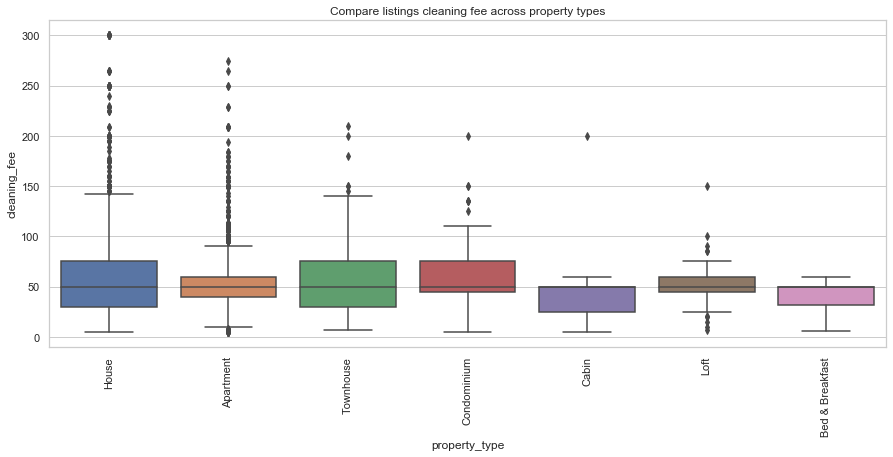

In [66]:
#Compare the cleaning fee across the property types
sns.set(rc={'figure.figsize':(15, 6)})
sns.set(style="whitegrid")
plt.subplots(1,1)
ax = sns.boxplot(x='property_type', y='cleaning_fee', data=listings, order = listings.property_type.value_counts().iloc[:7].index)
plt.xticks(rotation=90)
plt.title ("Compare listings cleaning fee across property types");

* All the property types have the same average cleaning fee, except for the cabin and Bed & Breakfast (as we saw before looking ate the basic statistics table). These type of proprerties also have the lowest variability of prices, comparing to the others. 

* The highests value belong to Houses and Townhouses.

* Apartments have a lot of exceptions, with extreme values.


In [67]:
#Check the correlation between amenities and price
amenities_set= listings[['price','Amenity_TV','Amenity_Cable TV','Amenity_Internet','Amenity_Wireless Internet','Amenity_Air Conditioning','Amenity_Kitchen','Amenity_Heating','Amenity_Family/Kid Friendly','Amenity_Washer','Amenity_Dryer','Amenity_Free Parking on Premises','Amenity_Buzzer/Wireless Intercom','Amenity_Smoke Detector','Amenity_Carbon Monoxide Detector','Amenity_First Aid Kit','Amenity_Safety Card','Amenity_Fire Extinguisher','Amenity_Essentials','Amenity_Pets Allowed','Amenity_Pets live on this property','Amenity_Hot Tub','Amenity_Indoor Fireplace','Amenity_Shampoo','Amenity_Breakfast','Amenity_24-Hour Check-in','Amenity_Hangers','Amenity_Hair Dryer','Amenity_Iron','Amenity_Laptop Friendly Workspace','Amenity_Suitable for Events',
'Amenity_Elevator in Building','Amenity_Lock on Bedroom Door','Amenity_Wheelchair Accessible','Amenity_Gym','Amenity_Pool','Amenity_Smoking Allowed','Amenity_Doorman']]

#sns.heatmap(amenities_set.corr(),cmap=sns.diverging_palette(250, 10,as_cmap=True))

amenities_set.corr().sort_values(by='price', ascending = False)

,price,Amenity_TV,Amenity_Cable TV,Amenity_Internet,Amenity_Wireless Internet,Amenity_Air Conditioning,Amenity_Kitchen,Amenity_Heating,Amenity_Family/Kid Friendly,Amenity_Washer,Amenity_Dryer,Amenity_Free Parking on Premises,Amenity_Buzzer/Wireless Intercom,Amenity_Smoke Detector,Amenity_Carbon Monoxide Detector,Amenity_First Aid Kit,Amenity_Safety Card,Amenity_Fire Extinguisher,Amenity_Essentials,Amenity_Pets Allowed,Amenity_Pets live on this property,Amenity_Hot Tub,Amenity_Indoor Fireplace,Amenity_Shampoo,Amenity_Breakfast,Amenity_24-Hour Check-in,Amenity_Hangers,Amenity_Hair Dryer,Amenity_Iron,Amenity_Laptop Friendly Workspace,Amenity_Suitable for Events,Amenity_Elevator in Building,Amenity_Lock on Bedroom Door,Amenity_Wheelchair Accessible,Amenity_Gym,Amenity_Pool,Amenity_Smoking Allowed,Amenity_Doorman
price,1.000000,0.224740,0.239163,0.025932,0.028584,0.132880,0.126419,0.020923,0.257480,0.123350,0.110713,0.077628,0.037113,0.023031,0.053137,0.009648,0.055858,0.057382,-0.021241,0.085597,-0.107781,0.128703,0.146032,0.029812,-0.102893,0.020038,0.001612,0.021545,0.030498,0.010809,0.087313,0.094757,-0.096911,0.050703,0.116468,0.097723,-0.058051,0.123041
Amenity_Family/Kid Friendly,0.257480,0.174201,0.168225,0.116982,0.121965,0.084506,0.090102,0.126831,1.000000,0.147520,0.144135,0.207199,-0.002790,0.110087,0.116509,0.092536,0.125600,0.142516,0.062895,0.194344,-0.001311,0.120760,0.086586,0.122288,-0.021943,0.104622,0.092990,0.094729,0.088417,0.083698,0.091281,0.024446,-0.042055,0.111957,0.099017,0.099010,0.001266,0.033264
Amenity_Cable TV,0.239163,0.488234,1.000000,0.115900,0.111771,0.160684,0.102213,0.091818,0.168225,0.117137,0.118667,0.112682,0.050618,0.054280,0.056735,0.013838,0.076675,0.090042,0.003866,0.070143,-0.054875,0.132171,0.122292,0.043469,-0.039501,0.081215,0.094519,0.110640,0.116925,0.069197,0.073792,0.061650,-0.028120,0.039935,0.111665,0.154475,-0.035730,0.051417
Amenity_TV,0.224740,1.000000,0.488234,0.178992,0.167088,0.171965,0.189934,0.145047,0.174201,0.149471,0.162764,0.095949,0.075724,0.123800,0.127973,0.055699,0.068658,0.082829,0.089527,0.058981,-0.035791,0.080056,0.112633,0.094133,-0.069569,0.107853,0.111960,0.124941,0.123638,0.100149,0.013441,0.144633,-0.046580,0.077018,0.148458,0.104748,-0.047788,0.071862
Amenity_Indoor Fireplace,0.146032,0.112633,0.122292,0.067722,0.053439,-0.006478,0.115857,0.070591,0.086586,0.150429,0.142184,0.165883,-0.055795,0.039121,0.050503,0.105225,0.029699,0.083814,-0.016239,0.049360,0.058704,0.058461,1.000000,0.030821,0.045542,-0.035167,-0.037567,-0.021021,-0.023712,-0.011271,0.087097,-0.141251,0.009132,-0.043369,-0.077814,-0.051793,0.014163,-0.041476
Amenity_Air Conditioning,0.132880,0.171965,0.160684,0.062589,0.058188,1.000000,0.086502,0.074007,0.084506,0.071873,0.077663,-0.009912,0.144004,0.063415,0.071745,0.042139,0.074245,0.065377,0.058295,-0.001881,-0.049062,0.140641,-0.006478,0.079148,0.018033,0.084420,0.106279,0.112431,0.119216,0.085473,0.038819,0.218277,0.010543,0.128985,0.231592,0.145560,0.020596,0.186825
Amenity_Hot Tub,0.128703,0.080056,0.132171,0.034381,0.030737,0.140641,0.044527,-0.001460,0.120760,0.069980,0.077662,0.081846,0.097408,0.015700,0.016135,-0.023922,0.012043,0.048324,0.000347,0.033957,-0.018244,1.000000,0.058461,0.051889,0.002158,0.024350,0.053548,0.059013,0.054841,-0.012750,0.057433,0.217559,-0.004450,0.073706,0.344245,0.579119,0.034751,0.129420
Amenity_Kitchen,0.126419,0.189934,0.102213,0.175308,0.157749,0.086502,1.000000,0.235137,0.090102,0.305241,0.285000,0.042290,0.100828,0.122285,0.112229,0.024256,0.027555,0.092767,0.110512,0.035489,-0.094066,0.044527,0.115857,0.036187,-0.031155,0.052085,0.060612,0.069080,0.075493,0.066139,0.033413,0.128579,-0.067730,0.046283,0.083298,0.060032,0.004821,0.039389
Amenity_Washer,0.123350,0.149471,0.117137,0.147852,0.120217,0.071873,0.305241,0.153950,0.147520,1.000000,0.871658,0.097134,0.124841,0.087307,0.054761,0.058456,0.054820,0.057362,0.074154,0.070349,-0.062116,0.069980,0.150429,0.080909,-0.036150,0.085632,0.08456

In [68]:

print(listings.groupby('Amenity_Family/Kid Friendly').mean()['price']) 

print('')

print(listings.groupby('Amenity_Pets live on this property').mean()['price']) 

print('')

print(listings.groupby('Amenity_Breakfast').mean()['price']) 

Amenity_Family/Kid Friendly
0    103.702175
1    150.298688
Name: price, dtype: float64

Amenity_Pets live on this property
0    133.072234
1    109.997674
Name: price, dtype: float64

Amenity_Breakfast
0    130.395253
1     95.501754
Name: price, dtype: float64


* The amenity that has the most positive correlation with price is Family/Kid Friendly, i.e, the existence of this type of amenity is usually related to higher prices

* There is a negative correlation of price with Essentials, Smoking Allowed, Lock on Bedroom Door, Breakfast and Pets on the property. This happens because:(~45% higher)
      - Pet properties have a lower average price (~19% lower) 
      - Properties that serve breakfast also have a lower average price (~27% lower)
      
* As curiosity, there are some interesting correlations between the amenities:
    - houses with gym also have air conditioning
    - houses with elevator in the building, usually also have air conditioning
    - Heating and Internet and 
    - The presence of Heating and Kitchens
    - Houses that are family/kid friendly, usually have free parking on premises


# Q3. Which are the most popular neighborhoods in Seattle?

For the 3rd question we would like to evaluate which are the most trendy and profitable areas around Seattle, In order to determine the best locations to invest in an Airbnb.

In [69]:
# Create a temporary dataframe without the 'Other neighborhoods' classes
temp_listings = listings[(listings.neighbourhood_group_cleansed != 'Other neighborhoods')]

#Count the number of houses by neighbourhood
temp_listings.groupby('neighbourhood_group_cleansed').count()['id'].sort_values(ascending = False)

neighbourhood_group_cleansed
Capitol Hill           547
Downtown               509
Central Area           359
Queen Anne             288
Ballard                224
West Seattle           197
Rainier Valley         156
University District    120
Beacon Hill            116
Cascade                 81
Delridge                77
Northgate               74
Lake City               66
Magnolia                57
Seward Park             42
Interbay                11
Name: id, dtype: int64

Text(0.5, 1.0, 'Compare listings price across neighbourhoods')

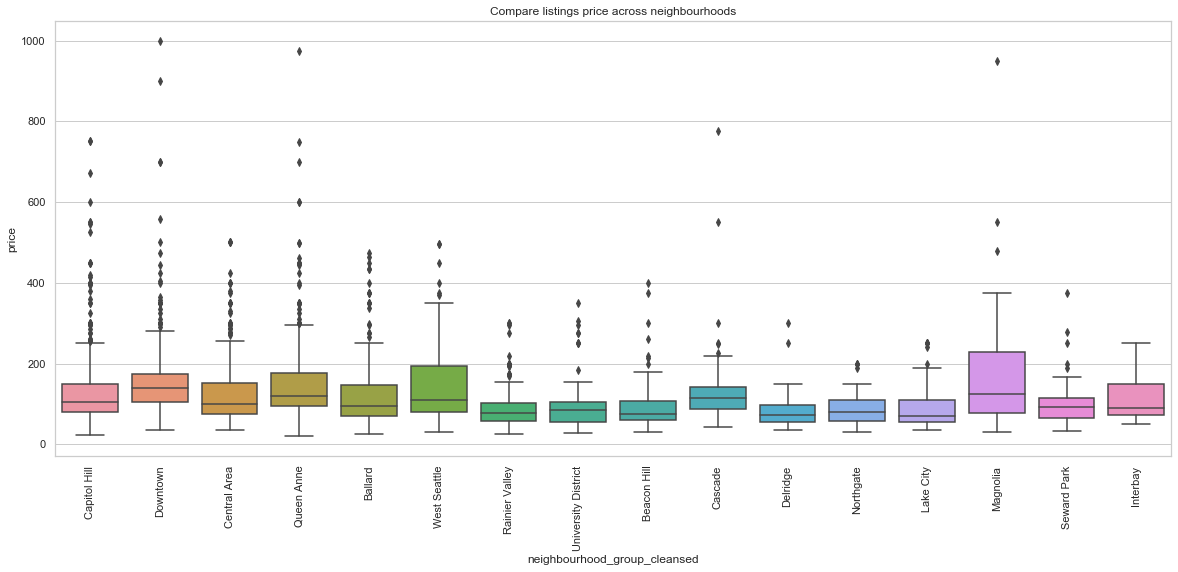

In [70]:
#Plot the distribution of prices across neighbourhoods
sns.set(rc={'figure.figsize':(20, 8)})
sns.set(style="whitegrid")

ax = sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=temp_listings ,order = temp_listings.neighbourhood_group_cleansed.value_counts().iloc[:16].index)
plt.xticks(rotation=90)
plt.title ("Compare listings price across neighbourhoods")

* Downtown, Magnolia, Cascade and West Seattle are neighbourhoods with the higher average prices;
* For the remaining the average price is very similar;

* We can find the most expensive houses in Downtown and Queen Anne, but these are extreme values for the area

* West Seattle and Magnolia are the neighbourhood where we can find the the greatest dispersion of values

In [71]:
#Check how many super hosts exist per neighbourhood
print(temp_listings.groupby('host_is_superhost').count()['id']) 

temp_listings.groupby(['neighbourhood_group_cleansed','host_is_superhost']).count()['id'].sort_values(ascending = False)

host_is_superhost
0    2315
1     609
Name: id, dtype: int64


neighbourhood_group_cleansed  host_is_superhost
Capitol Hill                  0                    463
Downtown                      0                    404
Central Area                  0                    260
Queen Anne                    0                    227
Ballard                       0                    163
West Seattle                  0                    154
Rainier Valley                0                    118
University District           0                    113
Downtown                      1                    105
Beacon Hill                   0                     99
Central Area                  1                     99
Capitol Hill                  1                     84
Cascade                       0                     65
Queen Anne                    1                     61
Ballard                       1                     61
Delridge                      0                     58
Lake City                     0                     54
Northgate        

We can find the most superhosts (around 57%) in the following neighbourhoods:
   - Downtown
   - Central Area
   - Capitol Hill
   - Queen Anne

# Q4. Is a strict cancellation policy bad for the business?

This is a pertinent question for the Airbnb market. On one hand a cancellation policy gives the host some security. However, on the other hand, it can pass an image of inflexibility to the customer. 

What we seek to investigate here is if I opt for a strict cancellation policy, can I be losing customers or getting bad reviews?

cancellation_policy
flexible    1092
moderate    1219
strict      1387
Name: id, dtype: int64


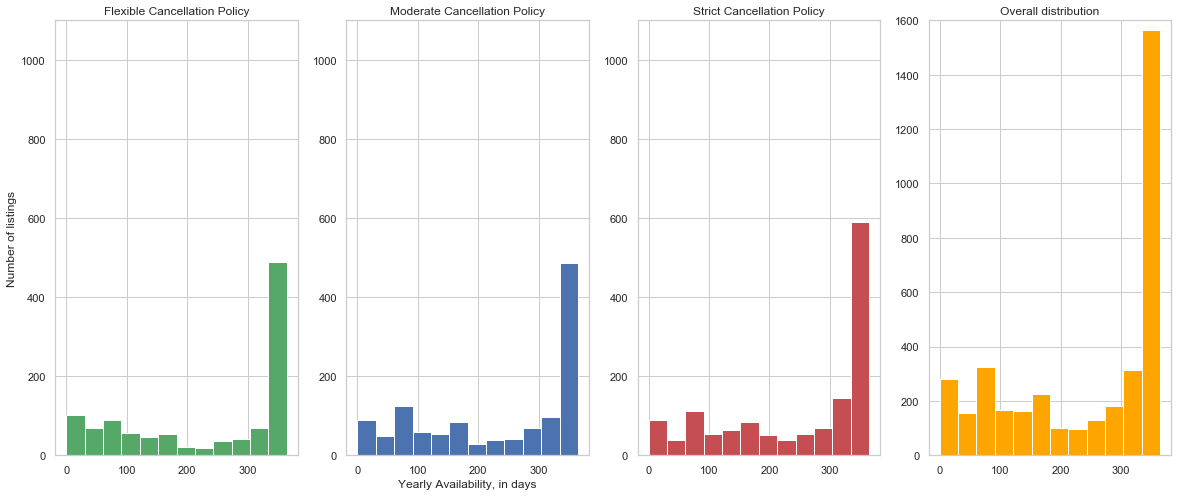

In [72]:
#Check how many houses exist per each type of cancellation policy
print(listings.groupby('cancellation_policy').count()['id']) 

#Compare availability distribuiton by cancellation policy
list0 = listings['availability_365']
list1 = listings[listings['cancellation_policy']=='flexible'].availability_365
list2 = listings[listings['cancellation_policy']=='moderate'].availability_365
list3 = listings[listings['cancellation_policy']=='strict'].availability_365
bins = np.linspace(0, 365, 13)

ylim = np.linspace(0,1100,200)

fig, ax = plt.subplots(1,4)
ax[0].hist(list1, bins, ylim, color = 'g', label = 'Flexible Cancellation Policy')
ax[1].hist(list2, bins, ylim, color = 'b', label = 'Moderate Cancellation Policy')
ax[2].hist(list3, bins, ylim, color = 'r', label = 'Strict Cancellation Policy')
ax[3].hist(list0, bins, ylim, color = 'orange', label = 'Overall distribution')

ax[0].set_ylim([0,1100])
ax[1].set_ylim([0,1100])
ax[2].set_ylim([0,1100])
ax[3].set_ylim([0,1600])

ax[0].set_title('Flexible Cancellation Policy')
ax[1].set_title('Moderate Cancellation Policy')
ax[2].set_title('Strict Cancellation Policy')
ax[3].set_title('Overall distribution')
ax[1].set_xlabel('Yearly Availability, in days')
ax[0].set_ylabel('Number of listings')

plt.show()

* **37,5%** of the owners ar opting for strict cancellation policies. Only **29,5%** adopts flexible policies.

* The histogram on the right shows the distribution of availability throughout 2016. The histograms on the left represent the distribution for each of the cancellation policies.

* We can see that all the cancellation policies have the same distribution throughout the year. This means that **the cancellation policy doesn't affect the availability rate / occupancy rate.**

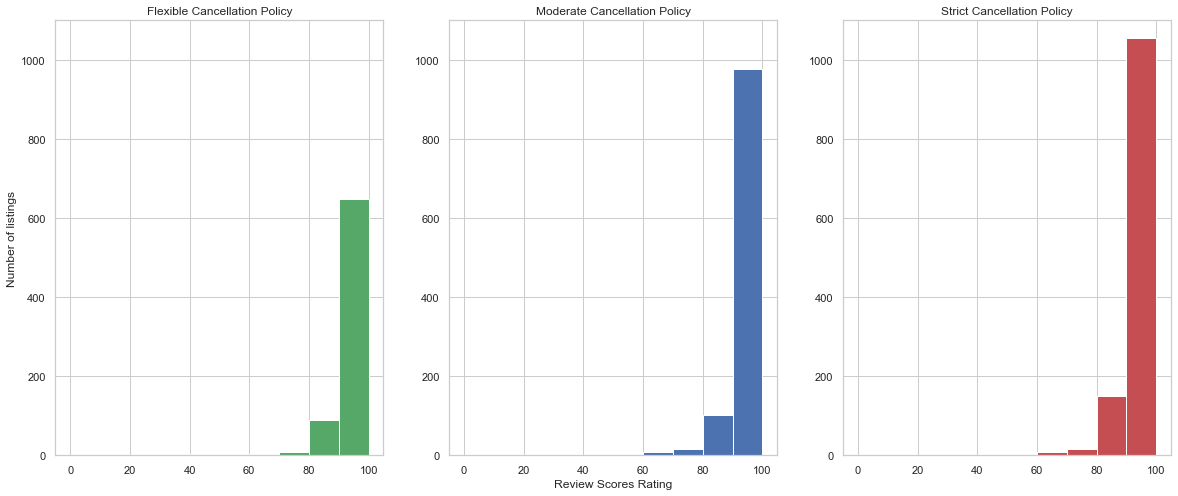

In [73]:
#Compare review score rating distribuiton by cancellation policy
list1 = listings[listings['cancellation_policy']=='flexible'].review_scores_rating
list2 = listings[listings['cancellation_policy']=='moderate'].review_scores_rating
list3 = listings[listings['cancellation_policy']=='strict'].review_scores_rating
bins = np.linspace(0, 100, 11)

ylim = np.linspace(0,1100,200)

fig, ax = plt.subplots(1,3)
ax[0].hist(list1, bins, ylim, color = 'g', label = 'Flexible Cancellation Policy')
ax[1].hist(list2, bins, ylim, color = 'b', label = 'Moderate Cancellation Policy')
ax[2].hist(list3, bins, ylim, color = 'r', label = 'Strict Cancellation Policy')

ax[0].set_ylim([0,1100])
ax[1].set_ylim([0,1100])
ax[2].set_ylim([0,1100])

ax[0].set_title('Flexible Cancellation Policy')
ax[1].set_title('Moderate Cancellation Policy')
ax[2].set_title('Strict Cancellation Policy')
ax[1].set_xlabel('Review Scores Rating')
ax[0].set_ylabel('Number of listings')

plt.show()


* Analyzing the distribution of the review scores rating, we can see that all cancellation policies have the same proportion of scores rating. Most customers give reviews higher than 90%, independently of the cancellation adopted by the owner.
* This means that **the cancellation policy doesn't affect the reviews score rating.**

# Q5. Predicting Pricing - in which features should bet to make the most out of my airbnb? 

In [74]:
#Create a function to prepare the dataset to be splitted and used for prediction

def clean_data(df): 

    #Create the dependent variable
    y = df['price']
    
    #Drop some columns
    df = df.drop(['price','id','host_id','host_since','neighbourhood_cleansed','zipcode'], axis = 1)

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    #Dummie the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
 
    
#Use the function to create X and y
X, y = clean_data(listings)  


In [75]:
#Create a function to find the optimal linear regression model 

def find_optimal_lm_mod(X, y, cutoffs, test_size = 0.25, random_state = 42, plot=True):
    r2_scores_test, r2_scores_train,num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:
        
        #reduce X matrix
        reduce_X = X.iloc[:,np.where((X.sum() > cutoff) == True) [0]]
        num_feats.append(reduce_X.shape[1])
        
        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state = random_state)
        
        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test,y_test_preds))
        r2_scores_train.append(r2_score(y_train,y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(num_feats, r2_scores_test, label = 'Test', alpha=0.5)
        plt.plot(num_feats, r2_scores_train, label = 'Train', alpha=0.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Numberof Features')
        plt.legend(loc=1)
        plt.show()
    
    best_cutoff = max(results, key=results.get)
    
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True) [0]]
    num_feats.append(reduce_X.shape[1])
    
    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state = random_state)
    
    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train,y_train)
    
    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test



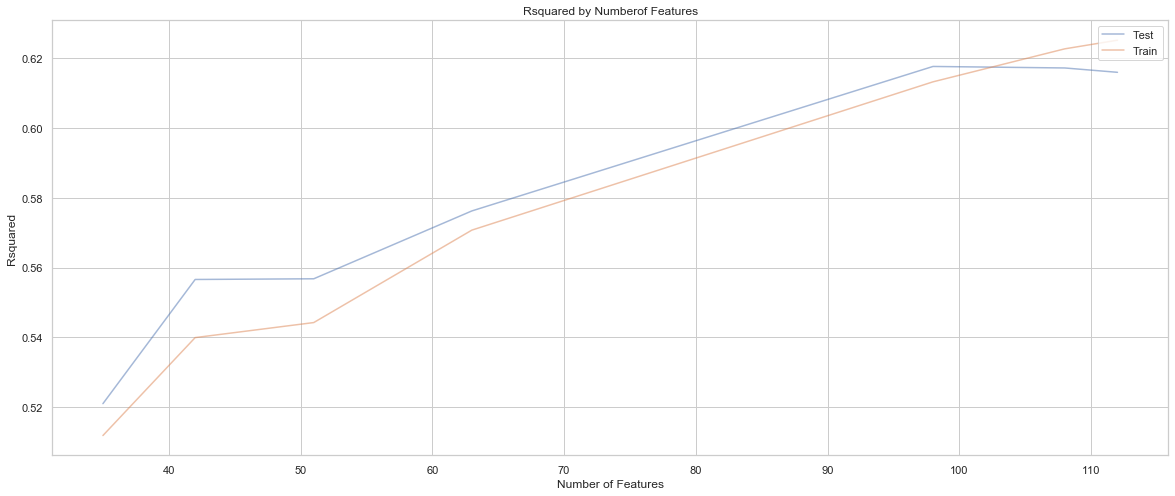

In [76]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

Through the graph we can see that the optimal number of features occurs around 97 or 98, as it is the point from which the Rsquared of the test set starts to decrease.

However, the firsts 42 features explain around 55,5% of the dependent variable (price) variability. 

In [77]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
93,room_type_Shared room,-71.140937,71.140937
48,Amenity_Wireless Internet,37.802064,37.802064
47,Amenity_Internet,-35.720801,35.720801
92,room_type_Private room,-35.653775,35.653775
86,neighbourhood_group_cleansed_Queen Anne,30.794329,30.794329
84,neighbourhood_group_cleansed_Downtown,27.655621,27.655621
9,bedrooms,27.240812,27.240812
82,neighbourhood_group_cleansed_Capitol Hill,24.125761,24.125761
8,bathrooms,22.644278,22.644278
96,calendar_updated_timerange_Months,21.712790,21.712790


The table above shows the coefficients associated with each variable, ordered in decreasing order of the absolute value. The positive or negative signs are indicators of the direction of the impact on the response of the dependent variable.

* A room of the type "Shared" has the greatest negative impact on the price. This means that, tipiacally, these types of rooms have lower prices


* Private Rooms, that appears as the 6th on the list, also have a negative impact on the price. The only room type that doesn't cause a great impact on the price is a "Entire home/apt"


* Other features that clearly cause great impact are amenities like Internet and Wireless
* Features like Suitable for events and a Hot Tub have a positive impact 
* Features like a Pool, a Hanger and Washers have negative impact


* Through the most important features we can also see that location is an extremely important factor: 
* Queen Anne, Downtow, Capitol Hill are neighbourhood that contribute for the price to increase.
* Rainier Valley is a neighbourhood where the price is deflated.


* The number bedrooms and bathrooms are also proportional to the price


* Finally, some characteristcs about the hosts also have great impact, namely its response time (if it is within an hour), and the fact of being considered a superhost, as we have studied before. 